In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("data/adult.data")

In [7]:
cols = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'label']

In [9]:
data = data[cols]

In [10]:
data.head(8)

,age,education_num,capital_gain,capital_loss,hours_per_week,label
0,39,13,2174,0,40,<=50K
1,50,13,0,0,13,<=50K
2,38,9,0,0,40,<=50K
3,53,7,0,0,40,<=50K
4,28,13,0,0,40,<=50K
5,37,14,0,0,40,<=50K
6,49,5,0,0,16,<=50K
7,52,9,0,0,45,>50K


In [11]:
data['label_code'] = pd.Categorical(data.label).codes

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
data[['label', 'label_code']].head(8)

,label,label_code
0,<=50K,0
1,<=50K,0
2,<=50K,0
3,<=50K,0
4,<=50K,0
5,<=50K,0
6,<=50K,0
7,>50K,1


In [13]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110fcc438>,
      dtype=object)

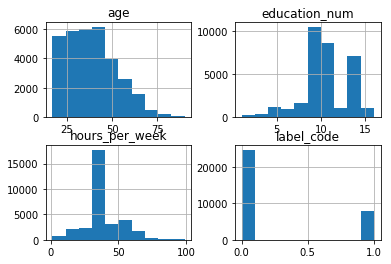

In [14]:
data[['age', 'hours_per_week', 'education_num', 'label_code']].hist()

In [15]:
data.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week,label_code
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [17]:
cross1 = pd.crosstab(pd.qcut(data['education_num'], [0, .25, .5, .75, 1]), data['label'])

In [18]:
cross1

label,<=50K,>50K
education_num,,
"(0.999, 9.0]",12835,1919
"(9.0, 10.0]",5904,1387
"(10.0, 12.0]",1823,626
"(12.0, 16.0]",4158,3909


In [19]:
from statsmodels.graphics.mosaicplot import mosaic

(<matplotlib.figure.Figure at 0x112629be0>,
 OrderedDict([(('(0.999, 9.0]', ' <=50K'),
               (0.0, 0.0, 0.4464224253288598, 0.8670434325597608)),
              (('(0.999, 9.0]', ' >50K'),
               (0.0,
                0.8703656916959733,
                0.4464224253288598,
                0.12963430830402656)),
              (('(9.0, 10.0]', ' <=50K'),
               (0.451348533703244,
                0.0,
                0.22060904860191918,
                0.8070752135591551)),
              (('(9.0, 10.0]', ' >50K'),
               (0.451348533703244,
                0.8103974726953677,
                0.22060904860191918,
                0.18960252730463217)),
              (('(10.0, 12.0]', ' <=50K'),
               (0.6768836906795475,
                0.0,
                0.07410116033823905,
                0.7419124220476456)),
              (('(10.0, 12.0]', ' >50K'),
               (0.6768836906795475,
                0.7452346811838583,
                0.074

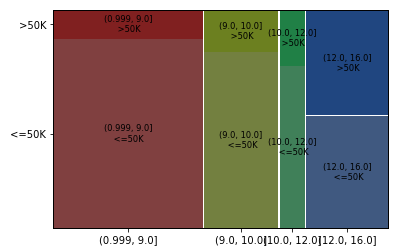

In [20]:
mosaic(cross1.stack())

In [22]:
cross2 = pd.crosstab(pd.cut(data["hours_per_week"], 5), data["label"])
cross2

label,<=50K,>50K
hours_per_week,,
"(0.902, 20.6]",2733,195
"(20.6, 40.2]",16262,3790
"(40.2, 59.8]",4192,2804
"(59.8, 79.4]",1312,932
"(79.4, 99.0]",221,120


In [27]:
cross2_norm = cross2.div(cross2.sum(1).astype(float), axis=0)
cross2_norm

label,<=50K,>50K
hours_per_week,,
"(0.902, 20.6]",0.933402,0.066598
"(20.6, 40.2]",0.810991,0.189009
"(40.2, 59.8]",0.599200,0.400800
"(59.8, 79.4]",0.584670,0.415330
"(79.4, 99.0]",0.648094,0.351906


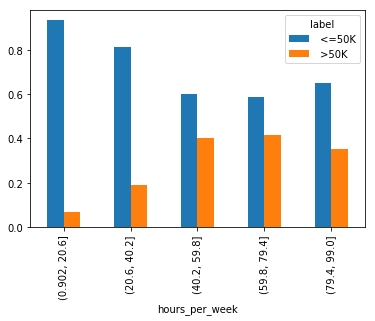

In [28]:
cross2_norm.plot(kind="bar")